In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

In [23]:
df_path = "data/animal"

idg = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

data_train = idg.flow_from_directory(
    df_path,
    shuffle=True,
    subset="training",
    target_size=(224,224)
)

data_validation = idg.flow_from_directory(
    df_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 1044 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [24]:
model = models.Sequential([
    #DeepLearning
    layers.Conv2D(64, (3, 3), strides=(2,2), activation='relu', padding="same", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding="same"),
    layers.MaxPooling2D(),

    #MachineLearning
    layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(data_train,
                    validation_data=data_validation,
                    epochs=40)

Epoch 1/40
33/33 [==============================] - 15s 455ms/step - loss: 1.8675 - accuracy: 0.2328 - val_loss: 1.5462 - val_accuracy: 0.2879
Epoch 2/40
33/33 [==============================] - 14s 433ms/step - loss: 1.4810 - accuracy: 0.3506 - val_loss: 1.3931 - val_accuracy: 0.4086
Epoch 3/40
33/33 [==============================] - 15s 441ms/step - loss: 1.3572 - accuracy: 0.4042 - val_loss: 1.2926 - val_accuracy: 0.4319
Epoch 4/40
33/33 [==============================] - 14s 436ms/step - loss: 1.2540 - accuracy: 0.4866 - val_loss: 1.2256 - val_accuracy: 0.4708
Epoch 5/40
33/33 [==============================] - 14s 439ms/step - loss: 1.1411 - accuracy: 0.5278 - val_loss: 1.1069 - val_accuracy: 0.5136
Epoch 6/40
33/33 [==============================] - 14s 437ms/step - loss: 1.1052 - accuracy: 0.5594 - val_loss: 1.0914 - val_accuracy: 0.5837
Epoch 7/40
33/33 [==============================] - 15s 439ms/step - loss: 1.0649 - accuracy: 0.5738 - val_loss: 1.1303 - val_accuracy: 0.5331

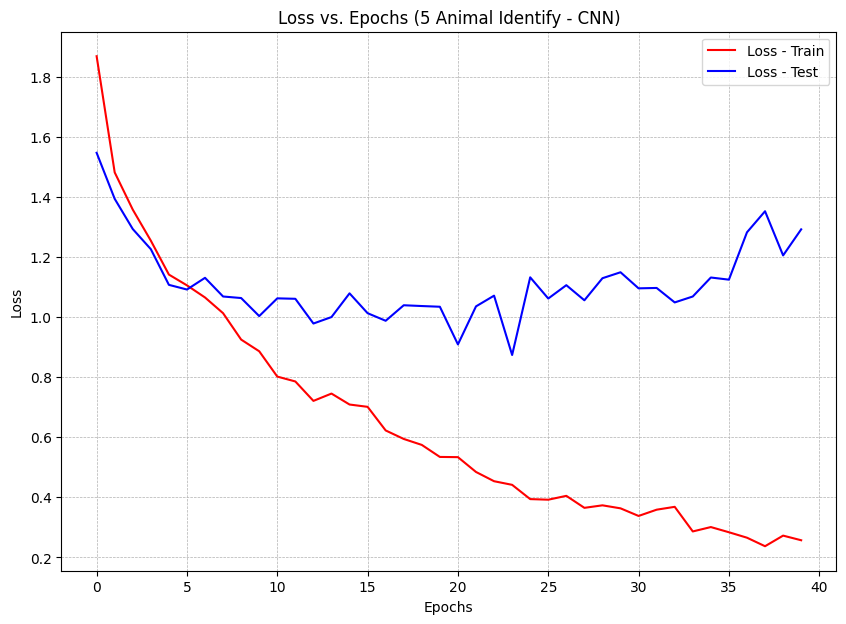

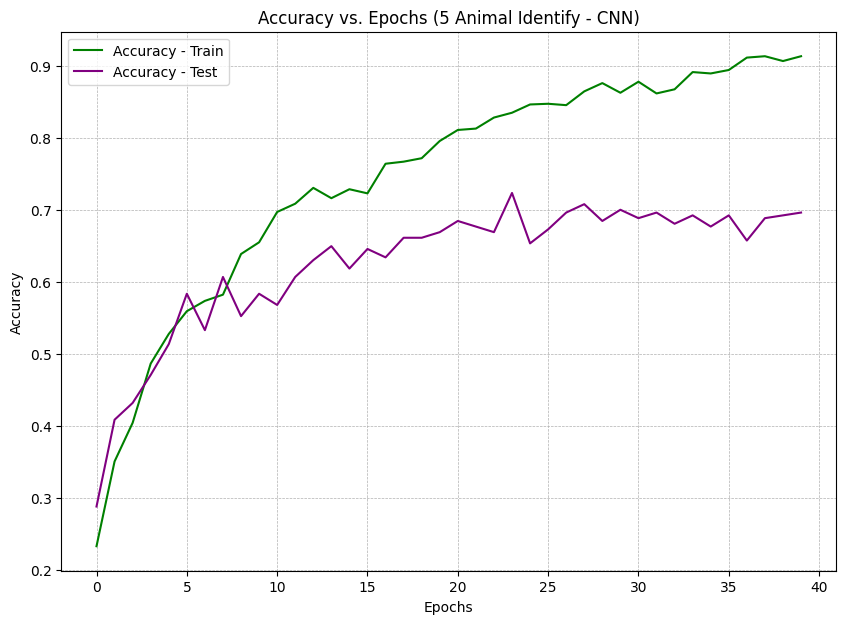

In [26]:
# Plot loss
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Loss - Train', color='red')
plt.plot(history.history['val_loss'], label='Loss - Test', color='blue')
plt.title('Loss vs. Epochs (5 Animal Identify - CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Accuracy - Train', color='green')
plt.plot(history.history['val_accuracy'], label='Accuracy - Test', color='purple')
plt.title('Accuracy vs. Epochs (5 Animal Identify - CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

1/1 [==============================] - 0s 14ms/step


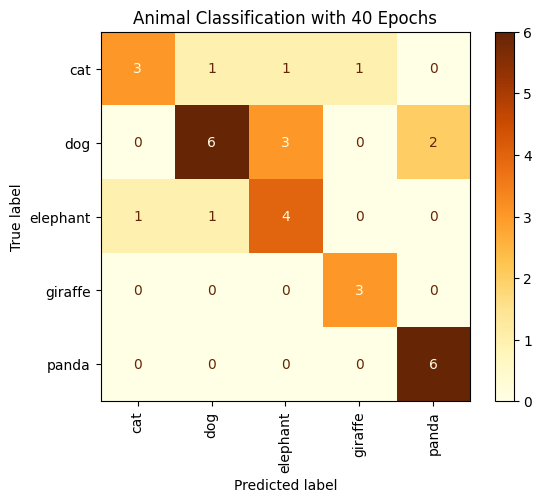

In [31]:
predicted_labels = []
actual_labels = []
animal_classes = ['cat', 'dog', 'elephant', 'giraffe', 'panda'] 
data_sample, labels_sample = data_validation[0] 

for img in data_sample:
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    predicted_labels.append(np.argmax(pred)) 

for actual in labels_sample:
    actual_labels.append(np.argmax(actual)) 

conf_matrix = confusion_matrix(actual_labels, predicted_labels)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=animal_classes)
display.plot(cmap=plt.cm.YlOrBr, xticks_rotation='vertical')
plt.title(f'Animal Classification with {len(history.epoch)} Epochs')
plt.show()


In [33]:
model.save('Result/save_model.h5')

In [36]:
model = load_model('Result/save_model.h5')
image_path = 'image1.jpg'
image = cv.imread("Test_data/pic.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  
image = cv.resize(image, (224, 224))  
image = image / 255.0  
image = np.expand_dims(image, axis=0) 

prediction = model.predict(image)
predicted_class = np.argmax(prediction)
emojis = {0: '🐱', 1: '🐶', 2: '🐘', 3: '🦒', 4: '🐼'}
emoji = emojis.get(predicted_class, "❓")  
print(f"The predicted animal is: {emoji}")

1/1 [==============================] - 0s 31ms/step
The predicted animal is: 🐼


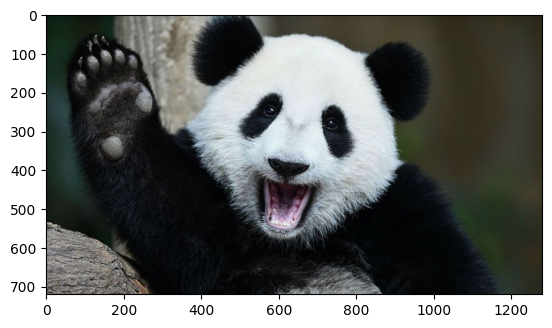

In [3]:
img = cv.imread("Test_data/pic.jpg")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()